In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
file_path = '/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv'
df = pd.read_csv(file_path)

# Inspect dataset
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team             24 non-null     object
 1   goals_scored     24 non-null     int64 
 2   goals_conceded   24 non-null     int64 
 3   wins             24 non-null     int64 
 4   draws            24 non-null     int64 
 5   losses           24 non-null     int64 
 6   points           24 non-null     int64 
 7   goal_difference  24 non-null     int64 
 8   rank             24 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ KB


team               0
goals_scored       0
goals_conceded     0
wins               0
draws              0
losses             0
points             0
goal_difference    0
rank               0
dtype: int64

In [26]:
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,win_rate,draw_rate,loss_rate
0,Manchester City,179,66,55,12,9,177,113,1,0.723684,0.157895,0.118421
1,Liverpool,154,83,44,19,13,151,71,2,0.578947,0.250000,0.171053
2,Arsenal,146,68,46,12,18,150,78,3,0.605263,0.157895,0.236842
3,Manchester United,130,102,39,17,20,134,28,4,0.513158,0.223684,0.263158
4,Chelsea,135,99,37,19,20,130,36,5,0.486842,0.250000,0.263158


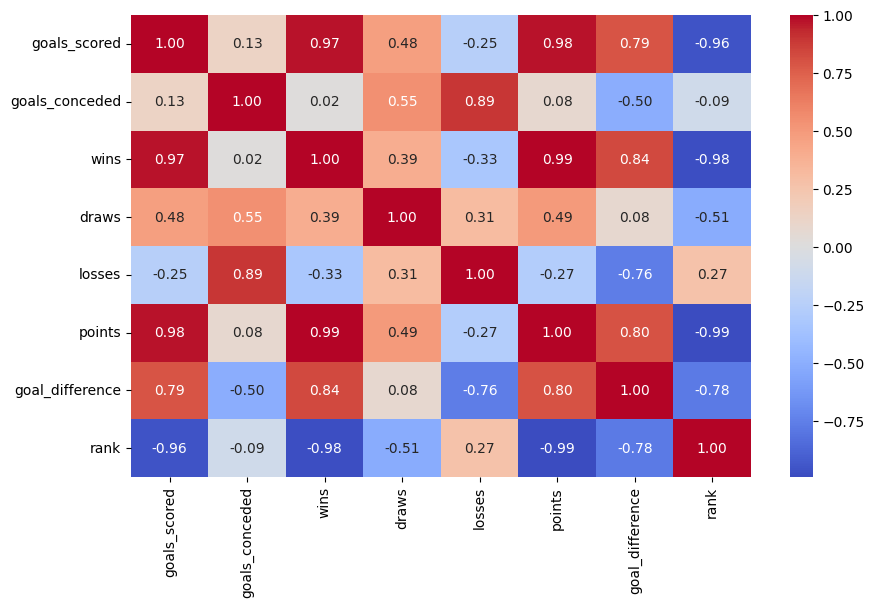

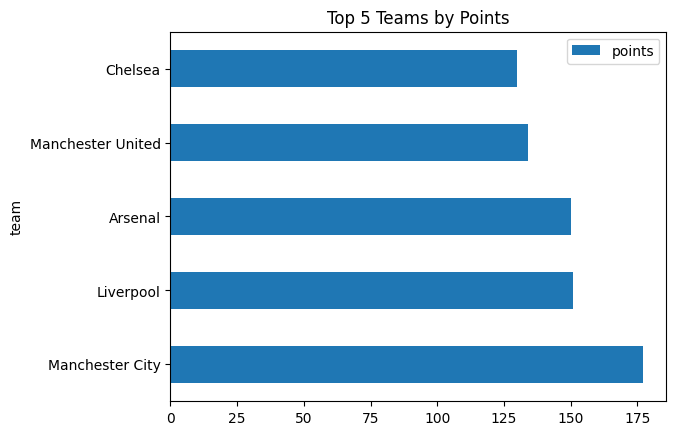

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['team']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Bar plot for top 5 teams by points
df.sort_values('points', ascending=False).head(5).plot(x='team', y='points', kind='barh')
plt.title("Top 5 Teams by Points")
plt.show()

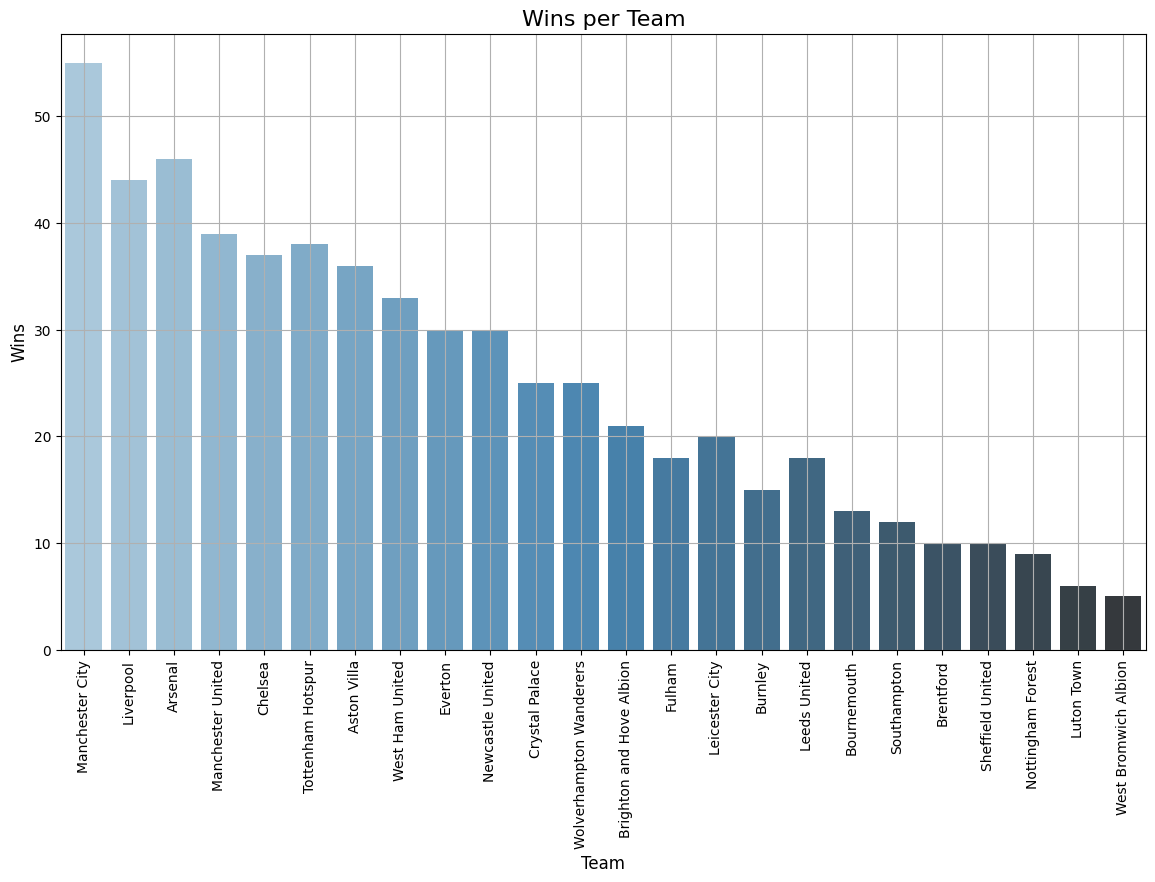

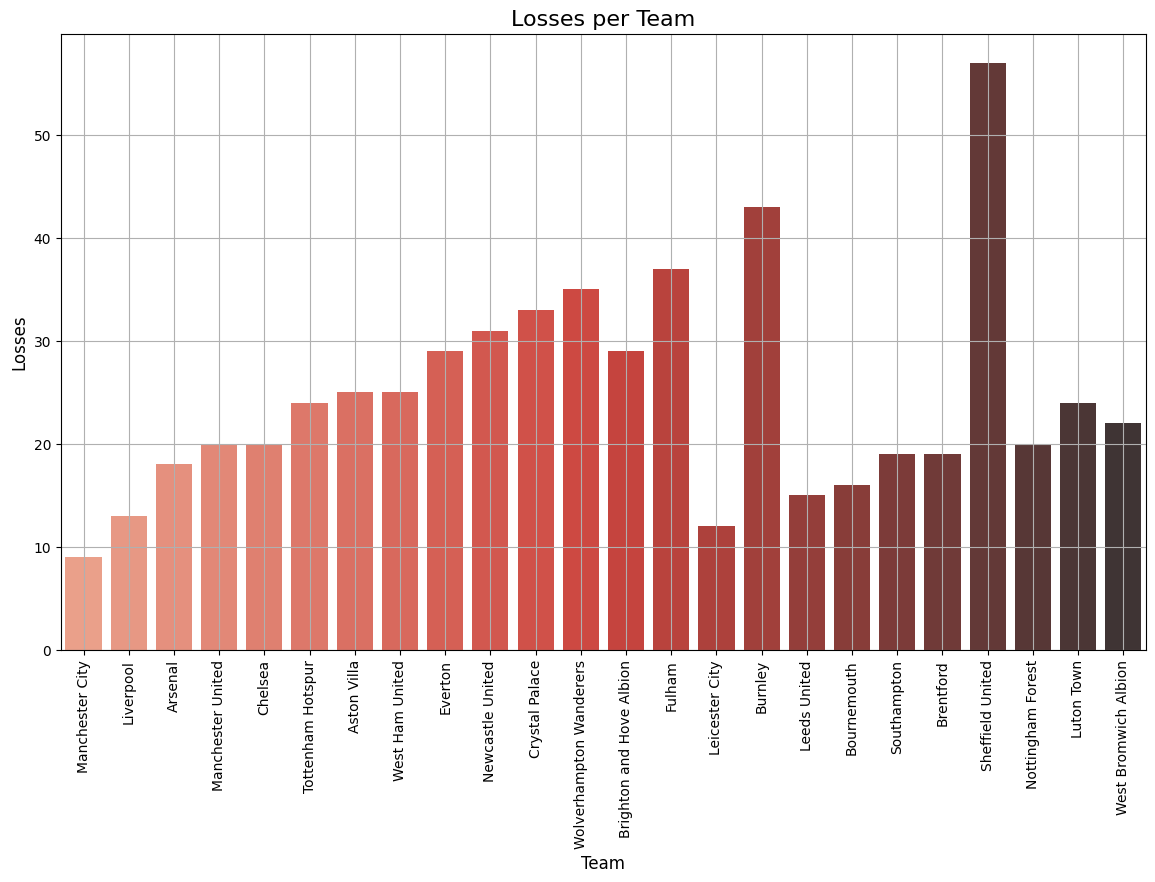

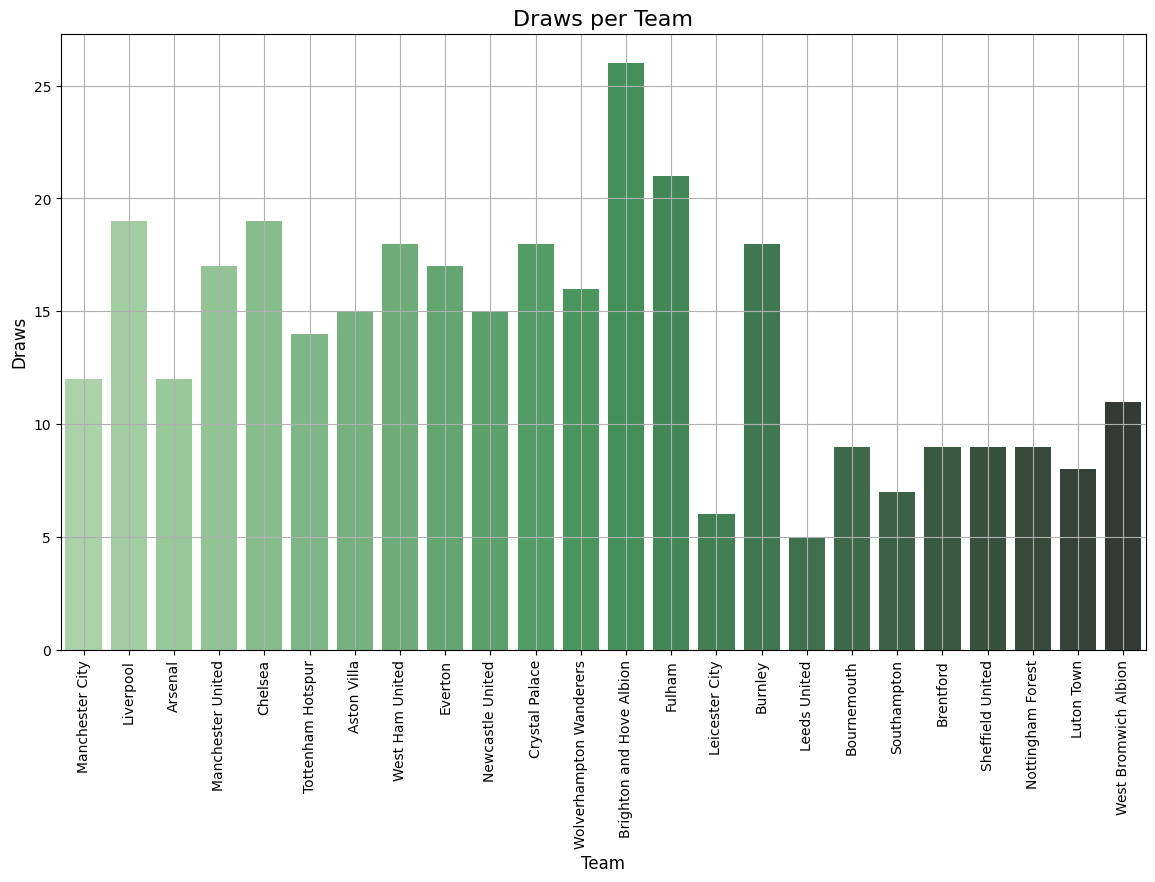

In [4]:
plt.figure(figsize=(14, 8))

# Plot Wins for each team
sns.barplot(x='team', y='wins', data=df, palette='Blues_d')
plt.title('Wins per Team', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Team', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.grid(True)
plt.show()

# Plot Losses for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='losses', data=df, palette='Reds_d')
plt.title('Losses per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Losses', fontsize=12)
plt.grid(True)
plt.show()

# Plot Draws for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='draws', data=df, palette='Greens_d')
plt.title('Draws per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Draws', fontsize=12)
plt.grid(True)
plt.show()

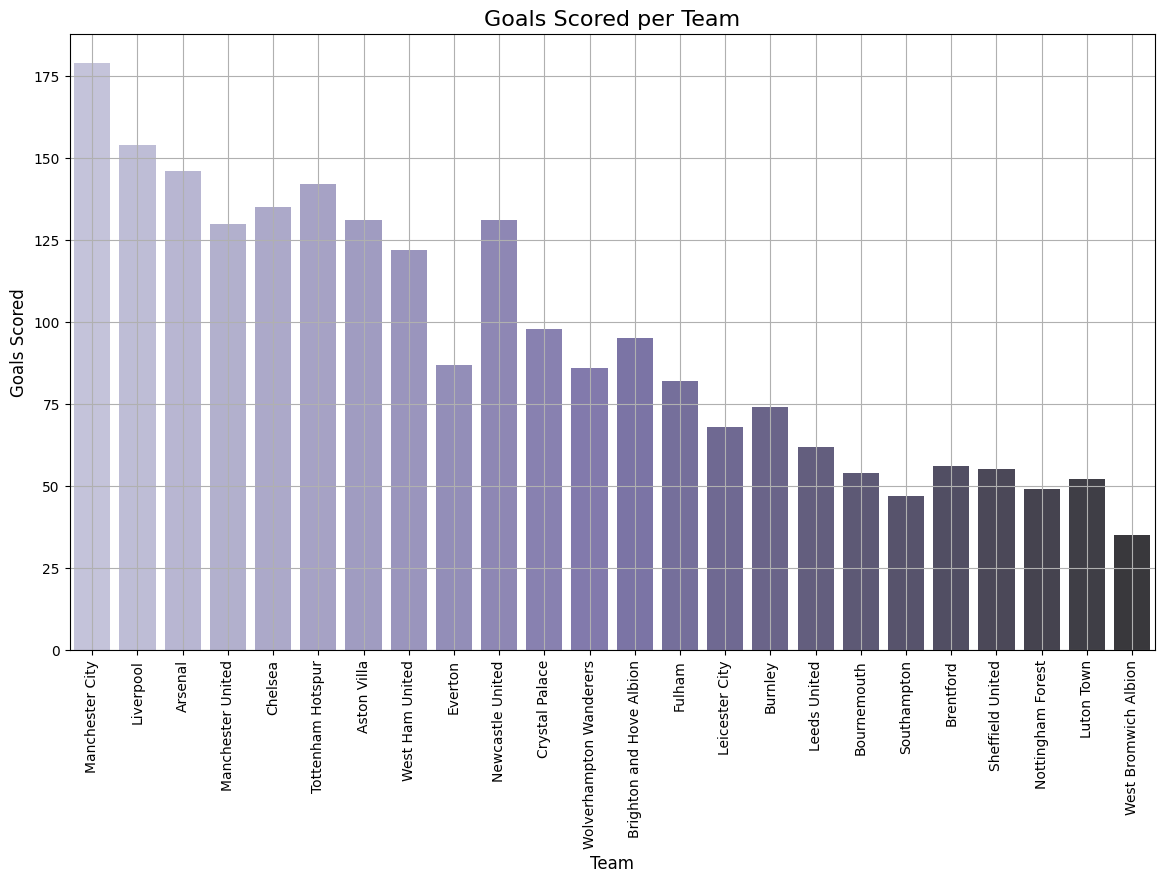

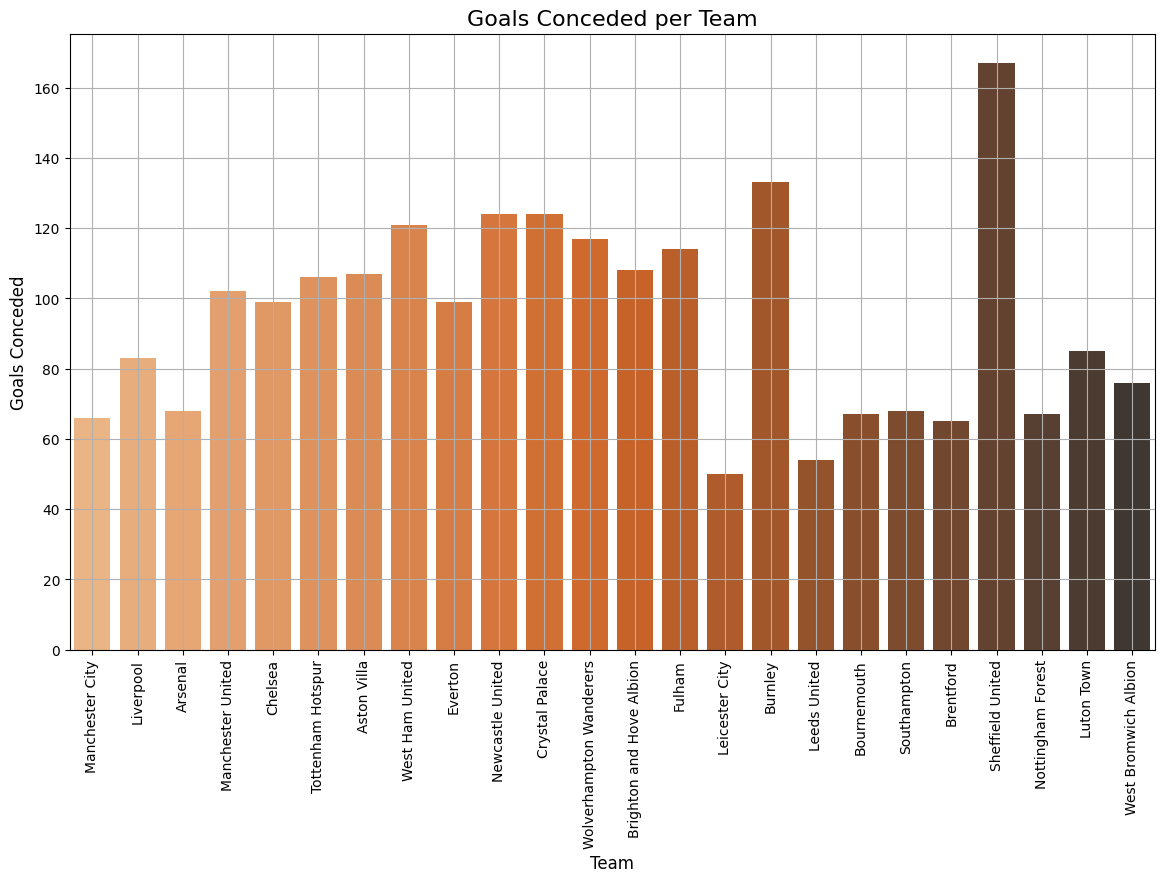

In [5]:
# Plot Goals Scored for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='goals_scored', data=df, palette='Purples_d')
plt.title('Goals Scored per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)
plt.grid(True)
plt.show()

# Plot Goals Conceded for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='goals_conceded', data=df, palette='Oranges_d')
plt.title('Goals Conceded per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Goals Conceded', fontsize=12)
plt.grid(True)
plt.show()

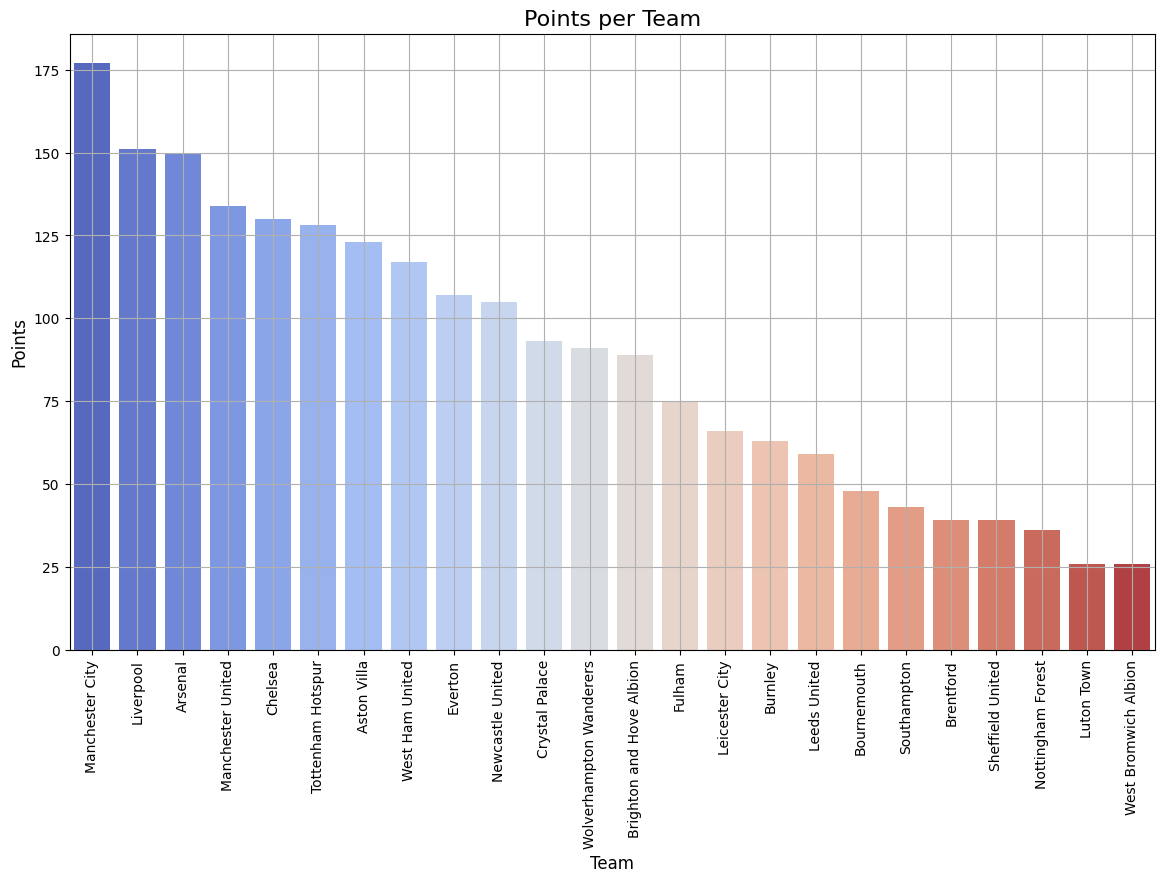

In [6]:
# Plot Points for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='points', data=df, palette='coolwarm')
plt.title('Points per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.grid(True)
plt.show()

In [7]:
# Feature Engineering: Add win_rate, draw_rate, loss_rate
df['win_rate'] = df['wins'] / (df['wins'] + df['draws'] + df['losses'])
df['draw_rate'] = df['draws'] / (df['wins'] + df['draws'] + df['losses'])
df['loss_rate'] = df['losses'] / (df['wins'] + df['draws'] + df['losses'])

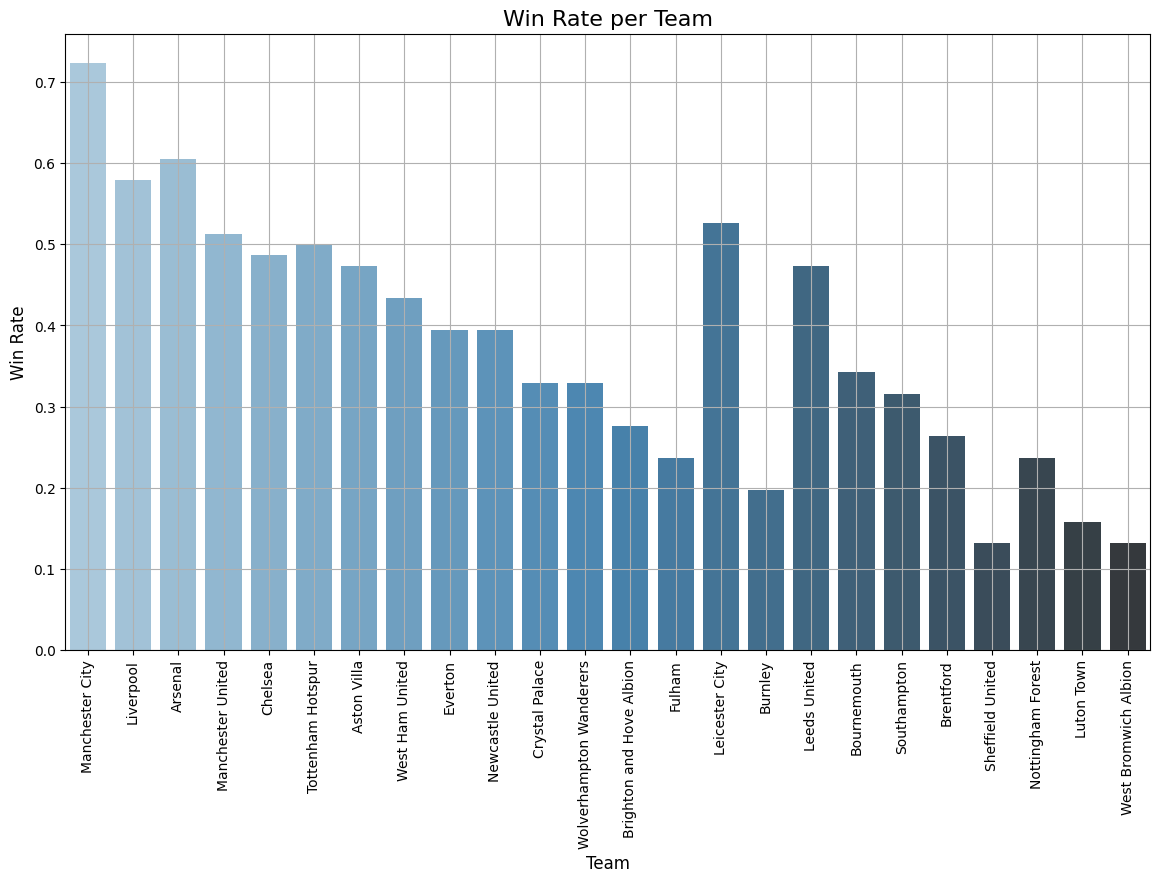

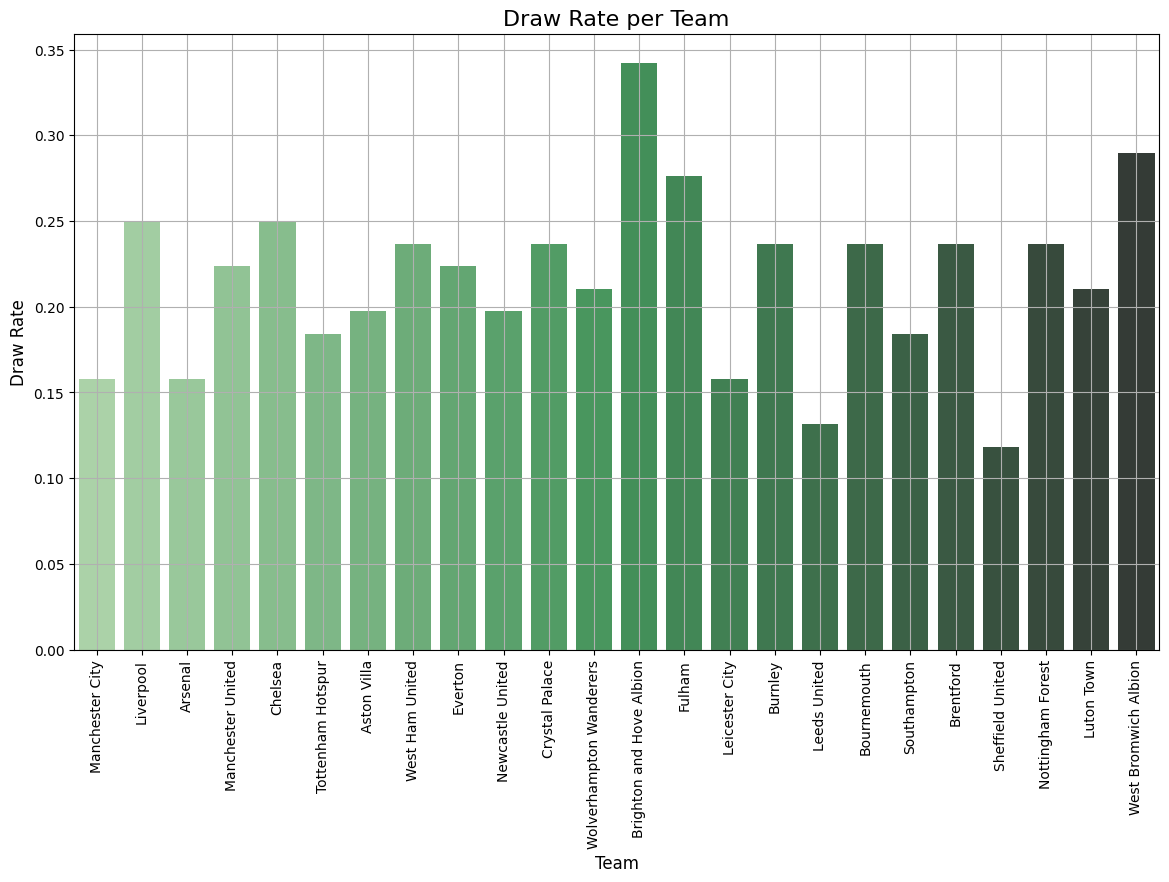

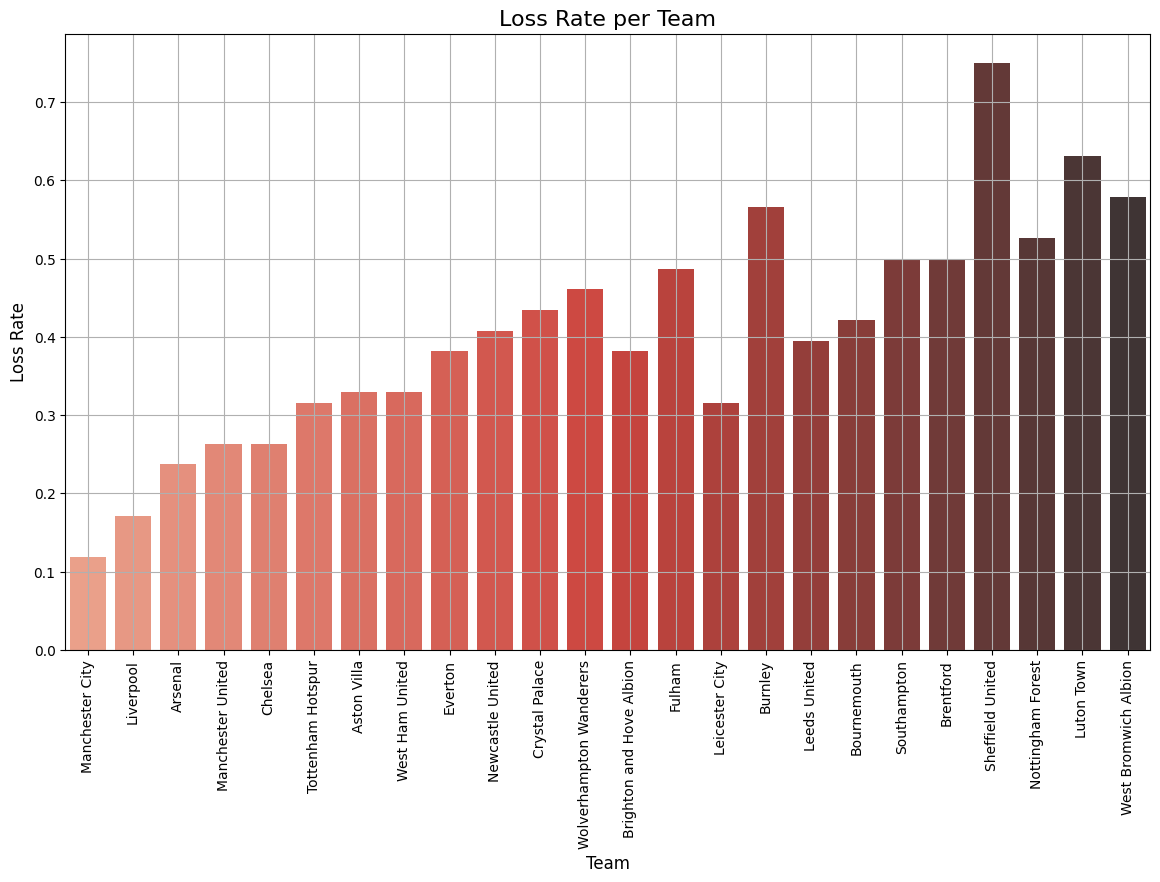

In [8]:
# Plot Win Rate for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='win_rate', data=df, palette='Blues_d')
plt.title('Win Rate per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.grid(True)
plt.show()

# Plot Draw Rate for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='draw_rate', data=df, palette='Greens_d')
plt.title('Draw Rate per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Draw Rate', fontsize=12)
plt.grid(True)
plt.show()

# Plot Loss Rate for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='loss_rate', data=df, palette='Reds_d')
plt.title('Loss Rate per Team', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Loss Rate', fontsize=12)
plt.grid(True)
plt.show()

# **1. Using Linear Regression**

In [9]:
X = df[['goals_scored', 'goals_conceded', 'wins', 'draws', 'losses', 'points', 'goal_difference']]
y_rank = df['rank']
y_points = df['points'] 

X_train, X_test, y_rank_train, y_rank_test = train_test_split(X, y_rank, test_size=0.2, random_state=42)
_, _, y_points_train, y_points_test = train_test_split(X, y_points, test_size=0.2, random_state=42)

linear_model_rank = LinearRegression()
linear_model_rank.fit(X_train, y_rank_train)

y_rank_pred_linear = linear_model_rank.predict(X_test)
mae_rank_linear = mean_absolute_error(y_rank_test, y_rank_pred_linear)
r2_rank_linear = r2_score(y_rank_test, y_rank_pred_linear)
cv_scores_rank = cross_val_score(linear_model_rank, X, y_rank, cv=5, scoring='neg_mean_absolute_error')

print(f"Linear Regression - Rank Mean Absolute Error: {mae_rank_linear}")
print(f"Linear Regression - Rank R²: {r2_rank_linear}")
print(f"Cross-Validated MAE for Rank Prediction: {-np.mean(cv_scores_rank)}")

linear_model_points = LinearRegression()
linear_model_points.fit(X_train, y_points_train)

y_points_pred_linear = linear_model_points.predict(X_test)
mae_points_linear = mean_absolute_error(y_points_test, y_points_pred_linear)
r2_points_linear = r2_score(y_points_test, y_points_pred_linear)
cv_scores_points = cross_val_score(linear_model_points, X, y_points, cv=5, scoring='neg_mean_absolute_error')

print(f"Linear Regression - Points Mean Absolute Error: {mae_points_linear}")
print(f"Linear Regression - Points R²: {r2_points_linear}")
print(f"Cross-Validated MAE for Rank Prediction: {-np.mean(cv_scores_points)}")

Linear Regression - Rank Mean Absolute Error: 0.933876615067749
Linear Regression - Rank R²: 0.9449888316831054
Cross-Validated MAE for Rank Prediction: 1.1539449629574237
Linear Regression - Points Mean Absolute Error: 3.2684965844964606e-14
Linear Regression - Points R²: 1.0
Cross-Validated MAE for Rank Prediction: 9.521272659185341e-15


In [10]:
y_rank_pred_all = linear_model_rank.predict(X)
y_points_pred_all = linear_model_points.predict(X)

residuals_rank = df['rank'] - y_rank_pred_all 
residuals_points = df['points'] - y_points_pred_all  
residuals_rank_df = pd.DataFrame({'team': df['team'], 'rank_residuals': residuals_rank})
residuals_points_df = pd.DataFrame({'team': df['team'], 'points_residuals': residuals_points})
residuals_combined_df = pd.merge(residuals_rank_df, residuals_points_df, on='team')

print("Residuals for Rank:")
print(residuals_combined_df[['team', 'rank_residuals']].sort_values('rank_residuals', key=abs, ascending=False))

print("\nResiduals for Points:")
print(residuals_combined_df[['team', 'points_residuals']].sort_values('points_residuals', key=abs, ascending=False))

Residuals for Rank:
                        team  rank_residuals
0            Manchester City        3.239981
23      West Bromwich Albion        1.460543
21         Nottingham Forest        0.905912
14            Leicester City       -0.836127
2                    Arsenal        0.804249
17               Bournemouth       -0.796724
13                    Fulham       -0.738737
19                 Brentford       -0.734332
15                   Burnley       -0.706681
12  Brighton and Hove Albion        0.683614
7            West Ham United        0.635743
18               Southampton       -0.604042
10            Crystal Palace       -0.462839
4                    Chelsea       -0.419274
3          Manchester United       -0.418672
8                    Everton        0.399418
11   Wolverhampton Wanderers        0.394186
20          Sheffield United        0.363022
6                Aston Villa        0.341215
9           Newcastle United       -0.108645
1                  Liverpool       

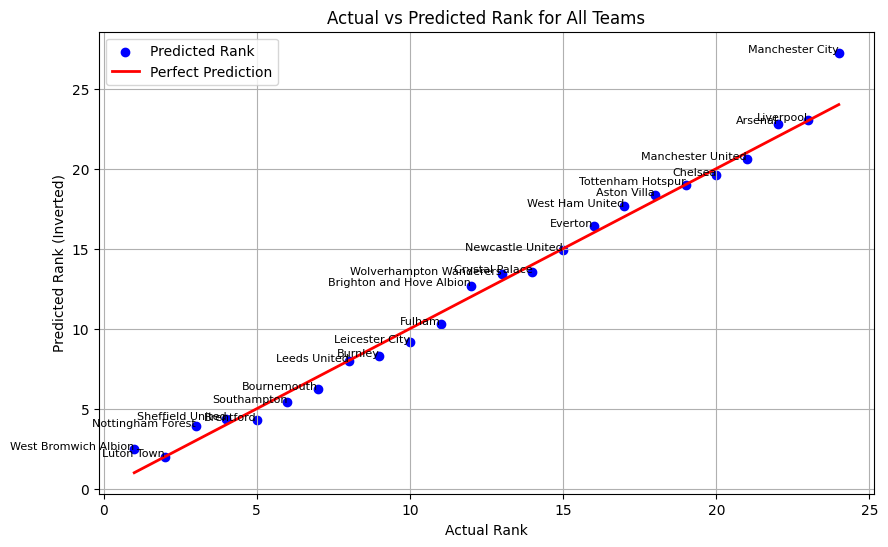

In [11]:
y_rank_pred_all = linear_model_rank.predict(X)
y_points_pred_all = linear_model_points.predict(X)

y_test_inverted = max(y_rank) + 1 - df['rank']  
y_pred_inverted = max(y_rank) + 1 - y_rank_pred_all 

plt.figure(figsize=(10, 6))
plt.scatter(y_test_inverted, y_pred_inverted, color='blue', label='Predicted Rank') 
plt.plot([min(y_test_inverted), max(y_test_inverted)], [min(y_test_inverted), max(y_test_inverted)], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Rank for All Teams')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank (Inverted)')
plt.legend()
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(y_test_inverted.iloc[i], y_pred_inverted[i], team, fontsize=8, ha='right')  

plt.show()

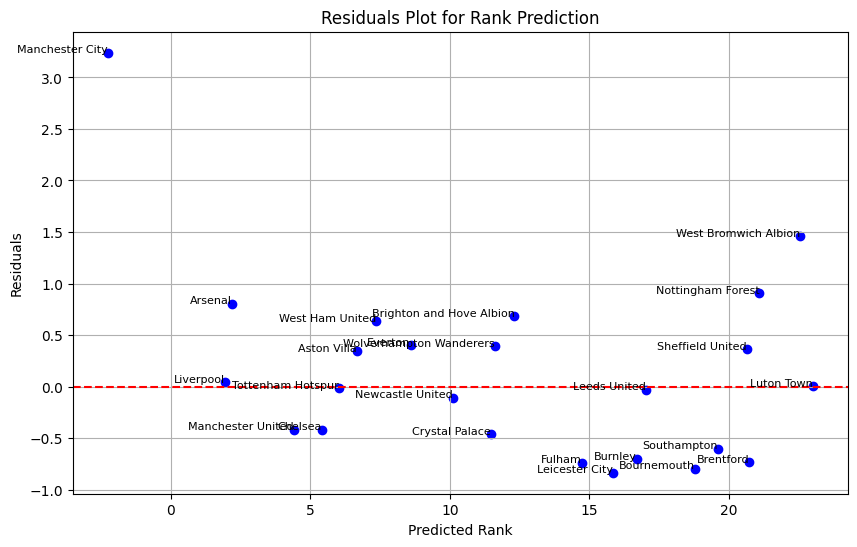

In [12]:
residuals_rank = df['rank'] - y_rank_pred_all
plt.figure(figsize=(10, 6))
plt.scatter(y_rank_pred_all, residuals_rank, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Rank Prediction')
plt.xlabel('Predicted Rank')
plt.ylabel('Residuals')
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(y_rank_pred_all[i], residuals_rank[i], team, fontsize=8, ha='right')

plt.show()

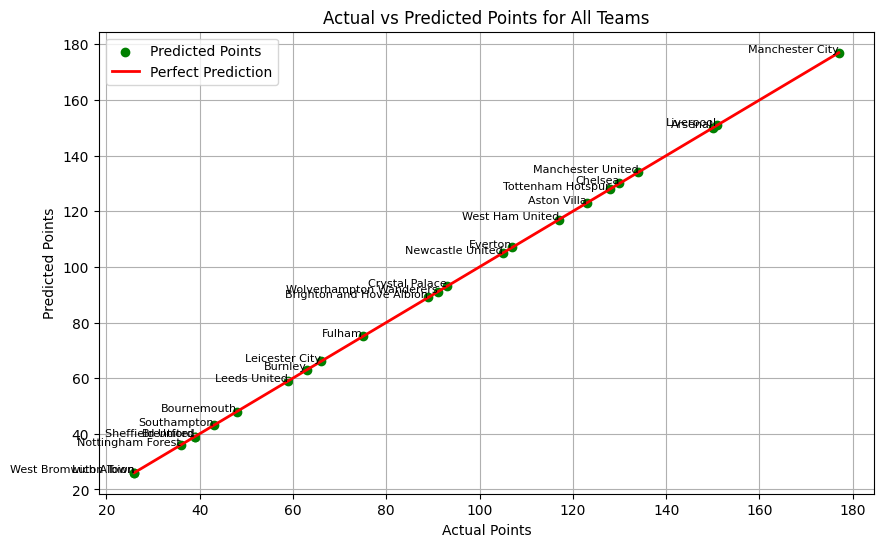

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['points'], y_points_pred_all, color='green', label='Predicted Points')
plt.plot([min(df['points']), max(df['points'])], [min(df['points']), max(df['points'])], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Points for All Teams')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(df['points'].iloc[i], y_points_pred_all[i], team, fontsize=8, ha='right')

plt.show()

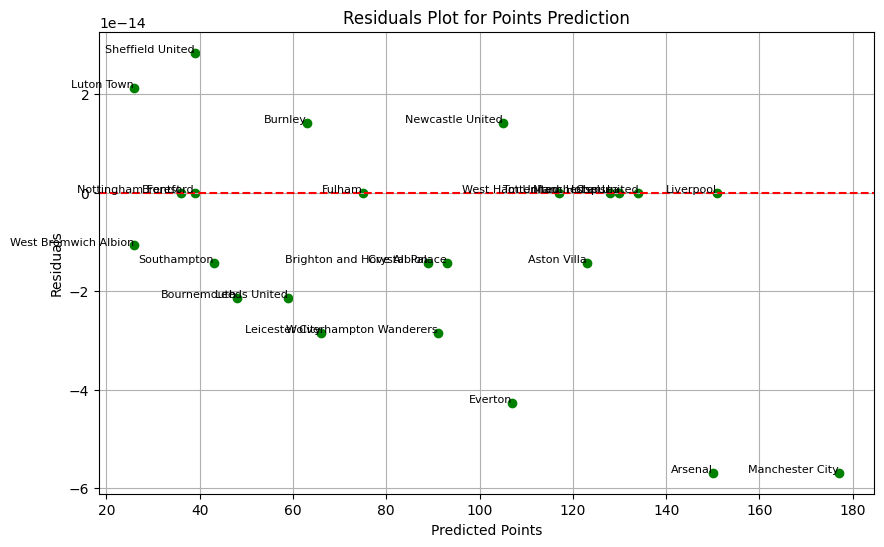

In [14]:
residuals_points = df['points'] - y_points_pred_all
plt.figure(figsize=(10, 6))
plt.scatter(y_points_pred_all, residuals_points, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Points Prediction')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(y_points_pred_all[i], residuals_points[i], team, fontsize=8, ha='right')

plt.show()

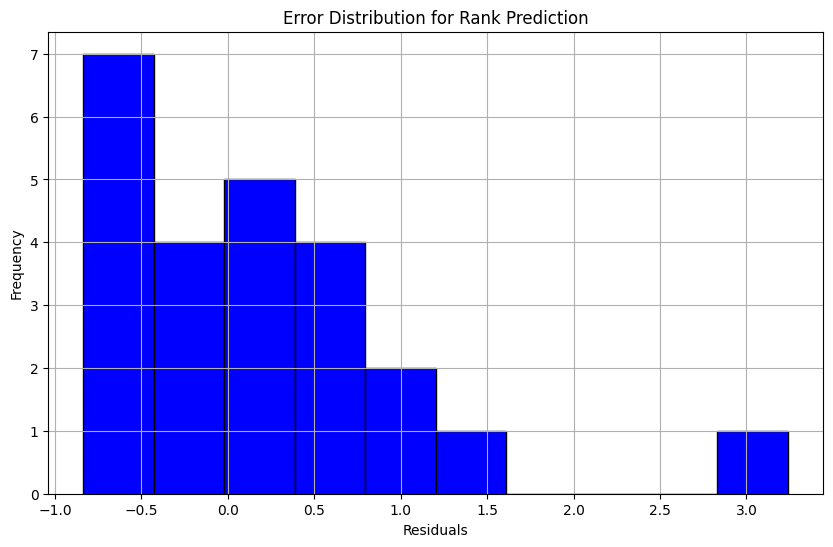

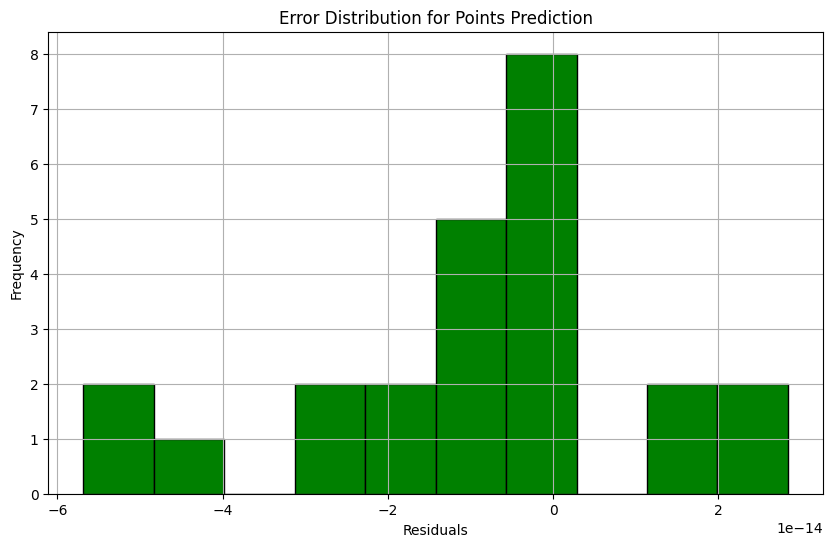

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_rank, bins=10, color='blue', edgecolor='black')
plt.title('Error Distribution for Rank Prediction')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals_points, bins=10, color='green', edgecolor='black')
plt.title('Error Distribution for Points Prediction')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. **Using Random Forest:**

In [16]:
rf_model_rank = RandomForestRegressor(random_state=42)
rf_model_rank.fit(X_train, y_rank_train)

y_rank_pred_rf = rf_model_rank.predict(X_test)
mae_rank_rf = mean_absolute_error(y_rank_test, y_rank_pred_rf)
r2_rank_rf = r2_score(y_rank_test, y_rank_pred_rf)
cv_scores_rank = cross_val_score(rf_model_rank, X, y_rank, cv=5, scoring='neg_mean_absolute_error')

print(f"Random Forest - Rank Mean Absolute Error: {mae_rank_rf}")
print(f"Random Forest - Rank R²: {r2_rank_rf}")
print(f"Cross-Validated MAE for Rank Prediction: {-np.mean(cv_scores_rank)}")

rf_model_points = RandomForestRegressor(random_state=42)
rf_model_points.fit(X_train, y_points_train)

y_points_pred_rf = rf_model_points.predict(X_test)
mae_points_rf = mean_absolute_error(y_points_test, y_points_pred_rf)
r2_points_rf = r2_score(y_points_test, y_points_pred_rf)
cv_scores_points = cross_val_score(rf_model_points, X, y_points, cv=5, scoring='neg_mean_absolute_error')

print(f"Random Forest - Points Mean Absolute Error: {mae_points_rf}")
print(f"Random Forest - Points R²: {r2_points_rf}")
print(f"Cross-Validated MAE for Points Prediction: {-np.mean(cv_scores_points)}")

Random Forest - Rank Mean Absolute Error: 1.0960000000000005
Random Forest - Rank R²: 0.9628001968503936
Cross-Validated MAE for Rank Prediction: 2.3708
Random Forest - Points Mean Absolute Error: 9.208
Random Forest - Points R²: 0.907785871802411
Cross-Validated MAE for Points Prediction: 11.550199999999998


In [17]:
y_rank_pred_all = rf_model_rank.predict(X)
y_points_pred_all = rf_model_points.predict(X)

residuals_rank = df['rank'] - y_rank_pred_all 
residuals_points = df['points'] - y_points_pred_all 
residuals_rank_df = pd.DataFrame({'team': df['team'], 'rank_residuals': residuals_rank})
residuals_points_df = pd.DataFrame({'team': df['team'], 'points_residuals': residuals_points})
residuals_combined_df = pd.merge(residuals_rank_df, residuals_points_df, on='team')

print("Residuals for Rank:")
print(residuals_combined_df[['team', 'rank_residuals']].sort_values('rank_residuals', key=abs, ascending=False))

print("\nResiduals for Points:")
print(residuals_combined_df[['team', 'points_residuals']].sort_values('points_residuals', key=abs, ascending=False))

Residuals for Rank:
                        team  rank_residuals
0            Manchester City           -1.98
18               Southampton           -1.14
16              Leeds United            1.09
8                    Everton           -1.05
23      West Bromwich Albion            0.97
17               Bournemouth           -0.80
10            Crystal Palace           -0.67
3          Manchester United           -0.65
1                  Liverpool           -0.65
21         Nottingham Forest            0.54
13                    Fulham           -0.51
2                    Arsenal           -0.40
12  Brighton and Hove Albion            0.37
19                 Brentford           -0.32
6                Aston Villa            0.31
22                Luton Town            0.29
9           Newcastle United            0.25
11   Wolverhampton Wanderers           -0.22
20          Sheffield United            0.22
5          Tottenham Hotspur            0.14
14            Leicester City       

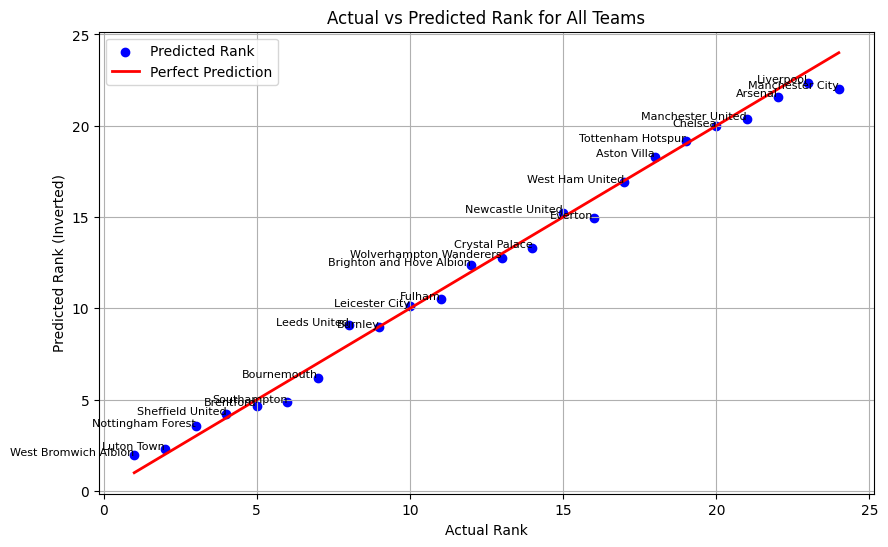

In [18]:
y_rank_pred_all_rf = rf_model_rank.predict(X)
y_points_pred_all_rf = rf_model_points.predict(X)
y_test_inverted = max(y_rank) + 1 - df['rank'] 
y_pred_inverted = max(y_rank) + 1 - y_rank_pred_all  

plt.figure(figsize=(10, 6))
plt.scatter(y_test_inverted, y_pred_inverted, color='blue', label='Predicted Rank')  # Use inverted ranks for plotting
plt.plot([min(y_test_inverted), max(y_test_inverted)], [min(y_test_inverted), max(y_test_inverted)], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Rank for All Teams')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank (Inverted)')
plt.legend()
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(y_test_inverted.iloc[i], y_pred_inverted[i], team, fontsize=8, ha='right')

plt.show()

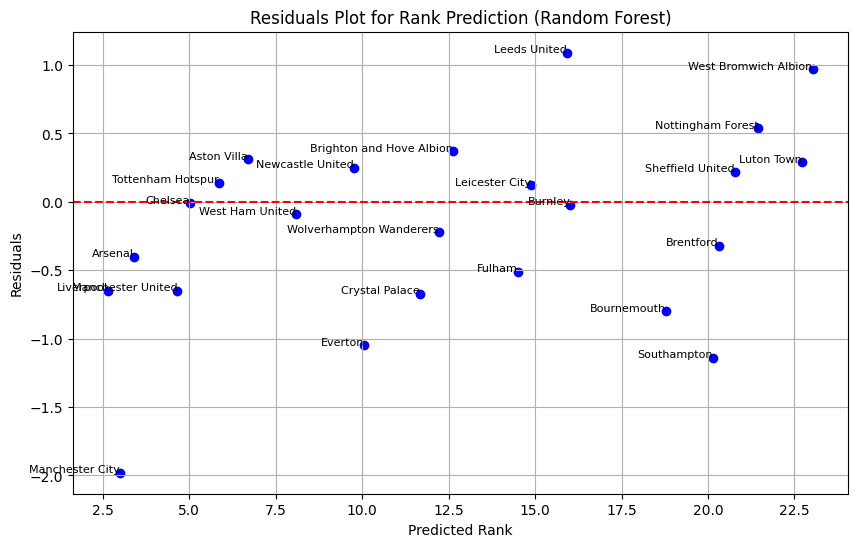

In [19]:
residuals_rank_rf = df['rank'] - y_rank_pred_all_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_rank_pred_all_rf, residuals_rank_rf, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Rank Prediction (Random Forest)')
plt.xlabel('Predicted Rank')
plt.ylabel('Residuals')
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(y_rank_pred_all_rf[i], residuals_rank_rf[i], team, fontsize=8, ha='right')

plt.show()

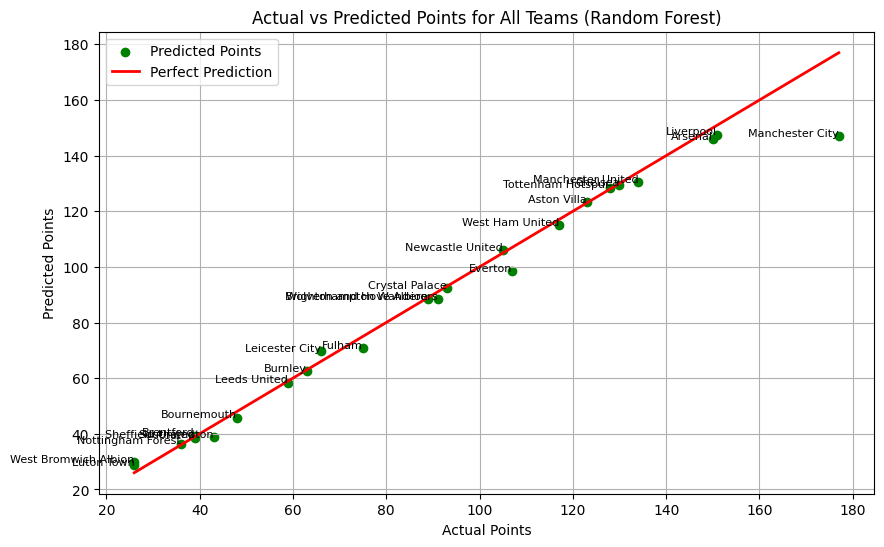

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['points'], y_points_pred_all_rf, color='green', label='Predicted Points')
plt.plot([min(df['points']), max(df['points'])], [min(df['points']), max(df['points'])], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Points for All Teams (Random Forest)')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(df['points'].iloc[i], y_points_pred_all_rf[i], team, fontsize=8, ha='right')

plt.show()

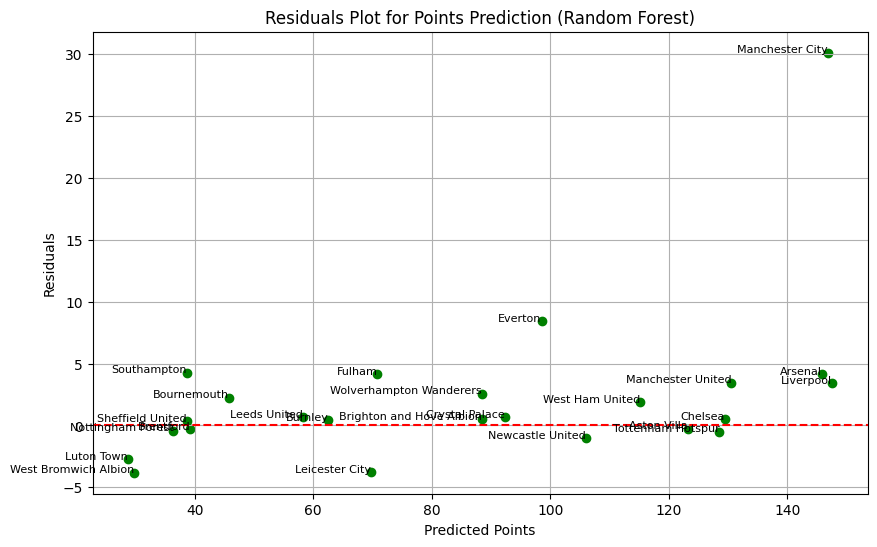

In [21]:
residuals_points_rf = df['points'] - y_points_pred_all_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_points_pred_all_rf, residuals_points_rf, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Points Prediction (Random Forest)')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.grid(True)

for i, team in enumerate(df['team']):
    plt.text(y_points_pred_all_rf[i], residuals_points_rf[i], team, fontsize=8, ha='right')

plt.show()

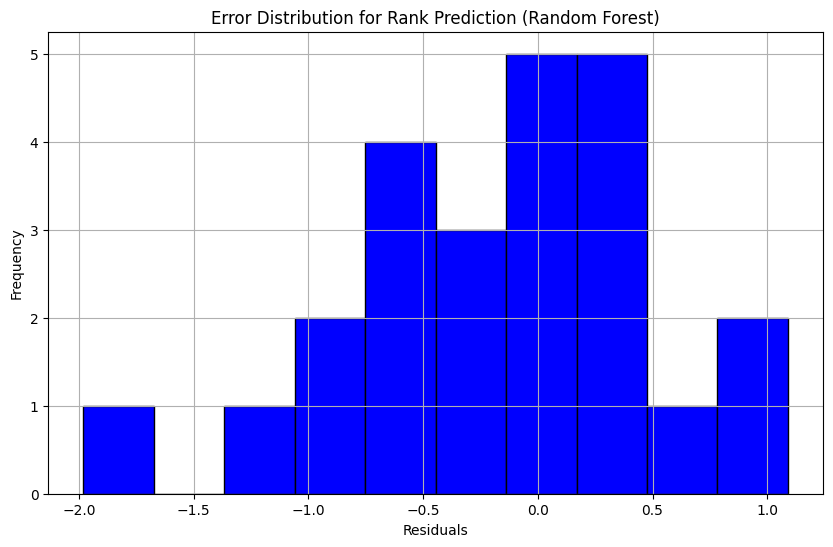

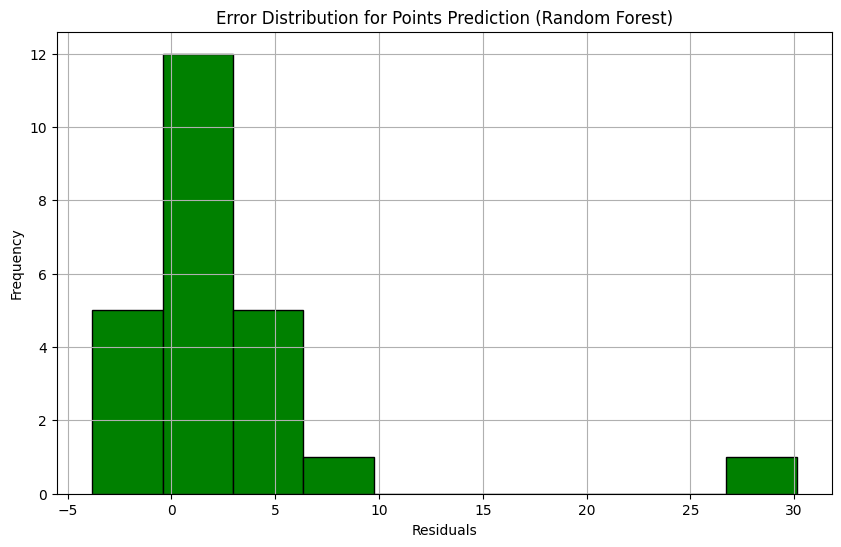

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_rank_rf, bins=10, color='blue', edgecolor='black')
plt.title('Error Distribution for Rank Prediction (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals_points_rf, bins=10, color='green', edgecolor='black')
plt.title('Error Distribution for Points Prediction (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# **Rank and Points Predictions**

In [23]:
y_rank_pred_linear_all = linear_model_rank.predict(X)
y_points_pred_linear_all = np.round(linear_model_points.predict(X))

predictions_df_linear = pd.DataFrame({
    'team': df['team'],
    'actual_rank': df['rank'],
    'predicted_rank_linear': y_rank_pred_linear_all,
    'predicted_points_linear': y_points_pred_linear_all,
})

print('Predictions Using Linear Regression:\n\n', predictions_df_linear)

Predictions Using Linear Regression:

                         team  actual_rank  predicted_rank_linear  \
0            Manchester City            1              -2.239981   
1                  Liverpool            2               1.956483   
2                    Arsenal            3               2.195751   
3          Manchester United            4               4.418672   
4                    Chelsea            5               5.419274   
5          Tottenham Hotspur            6               6.016510   
6                Aston Villa            7               6.658785   
7            West Ham United            8               7.364257   
8                    Everton            9               8.600582   
9           Newcastle United           10              10.108645   
10            Crystal Palace           11              11.462839   
11   Wolverhampton Wanderers           12              11.605814   
12  Brighton and Hove Albion           13              12.316386   
13       

In [24]:
y_rank_pred_rf_all = rf_model_rank.predict(X)
y_points_pred_rf_all = np.round(rf_model_points.predict(X)) 

predictions_df_rf = pd.DataFrame({
    'team': df['team'],
    'actual_rank': df['rank'],
    'predicted_rank_rf': y_rank_pred_rf_all,
    'predicted_points_rf': y_points_pred_rf_all,
})

print('Predictions Using Random Forest Regression:\n\n', predictions_df_rf)

Predictions Using Random Forest Regression:

                         team  actual_rank  predicted_rank_rf  \
0            Manchester City            1               2.98   
1                  Liverpool            2               2.65   
2                    Arsenal            3               3.40   
3          Manchester United            4               4.65   
4                    Chelsea            5               5.01   
5          Tottenham Hotspur            6               5.86   
6                Aston Villa            7               6.69   
7            West Ham United            8               8.09   
8                    Everton            9              10.05   
9           Newcastle United           10               9.75   
10            Crystal Palace           11              11.67   
11   Wolverhampton Wanderers           12              12.22   
12  Brighton and Hove Albion           13              12.63   
13                    Fulham           14              14.

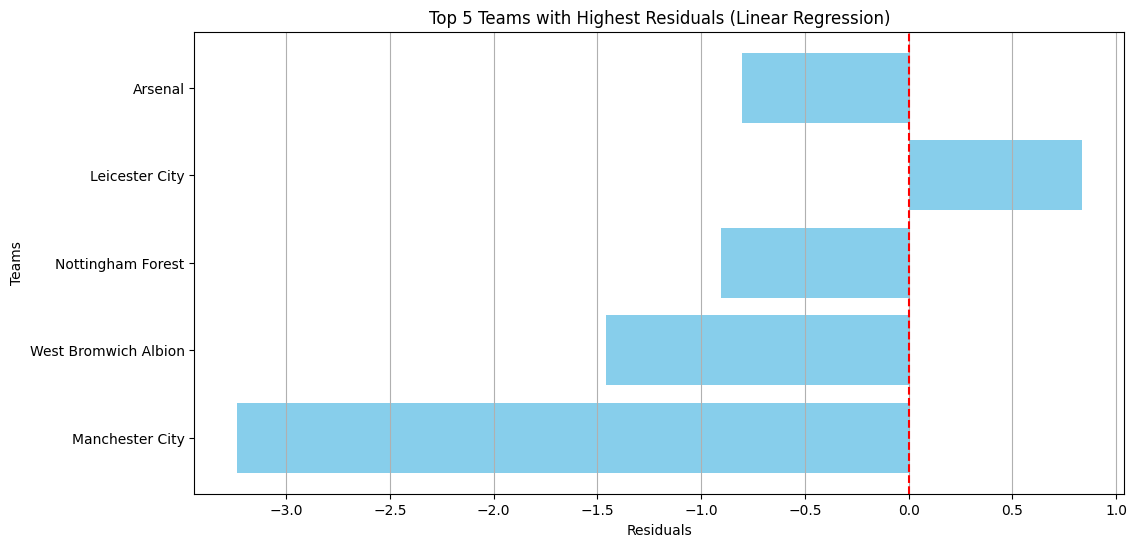

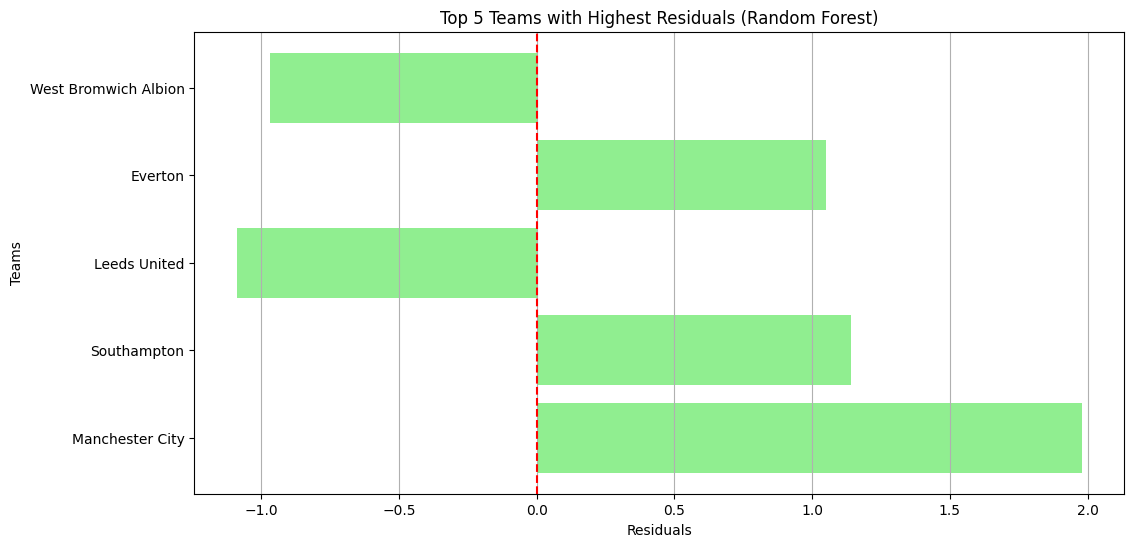

In [25]:
residuals_linear = y_rank_pred_linear_all - df['rank']
residuals_rf = y_rank_pred_rf_all - df['rank']

residuals_df_linear = pd.DataFrame({'team': df['team'], 'residuals': residuals_linear})
residuals_df_rf = pd.DataFrame({'team': df['team'], 'residuals': residuals_rf})

top_5_linear = residuals_df_linear.loc[residuals_df_linear['residuals'].abs().nlargest(5).index]
top_5_rf = residuals_df_rf.loc[residuals_df_rf['residuals'].abs().nlargest(5).index]

plt.figure(figsize=(12, 6))
plt.barh(top_5_linear['team'], top_5_linear['residuals'], color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title('Top 5 Teams with Highest Residuals (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Teams')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(top_5_rf['team'], top_5_rf['residuals'], color='lightgreen')
plt.axvline(0, color='red', linestyle='--')
plt.title('Top 5 Teams with Highest Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Teams')
plt.grid(axis='x')
plt.show()